<a href="https://colab.research.google.com/github/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning/blob/main/GB886_VIII_5_CarExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Used Car Prices

In this example, we consider a **regression problem** where we predict the prices of used cares. The features are attributes of the cars. This was a [kaggle competition that expired in November](https://www.kaggle.com/competitions/playground-series-s4e9).

## Business Setting

Here is an example of a hypothetical business setting where this predictive problem would be relevant:

"I work on a team for Autotrader and we want to provide our clients a simple way of obtaining price estimates for how much their car is worth. By providing potential sellers information on how much to expect, we believe the process will go smoother if they have a good assessment of how much their cars will be worth."

## Exploring and Preparing the Data

We start by loading and exploring the data. The exporation is going to be key in informing our modeling process.

### Loading Data

Let's load relevant packages and the data:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

Cloning into 'MSDIA_PredictiveModelingAndMachineLearning'...
remote: Enumerating objects: 260, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 260 (delta 83), reused 15 (delta 15), pack-reused 111 (from 1)
Receiving objects: 100% (260/260), 26.82 MiB | 5.32 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Updating files: 100% (57/57), done.


The dataset is large and therefore split into two training sets. We have to concatenate the two to get our "full" training set.

In [10]:
car_dat_1 = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VIII_5_train_1.csv')
car_dat_2 = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VIII_5_train_2.csv')
car_dat = pd.concat([car_dat_1, car_dat_2], axis=0)

We rely on the training set to build our model. So, "traning set" is a bit of a misnomer, because this is the data we will have to use to build (select) *and* train our model.

Let's take a look:

In [11]:
car_dat.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


So, the modeling task is to predict the *price* based on the car characteristics.

In addition to the training set, and this is typical for these competitions, we are given a *test* set for which we don't have the prices available. The competition task is to generate the predictions:

In [12]:
car_dat_test = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VIII_5_test.csv')
car_dat_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


So, we don't have *price* for these! The submission file will be exactly the predictions for these observations. Often, there is a *sample submission* file as an example. This is also the case here:

In [6]:
car_dat_sample = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VIII_5_sample_submission.csv')
car_dat_sample.head()

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016


### Exploring the data

Let's explore the training set a bit. Let's first look at some basic information:

In [7]:
car_dat.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [8]:
car_dat.info()
car_dat.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 88531
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 20.1+ MB


,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


So, there are only two numerical features in additional to the target: mileage and model year.

The other variables are categorical. Let's check all the levels for the categorical variables:

In [13]:
for column in car_dat.select_dtypes(include=['object']):
  print(f"{column}: {car_dat[column].unique()}")

brand: ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
model: ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']
fuel_type: ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
engine: ['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability' ...
 '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel'
 '139.0HP 1.6L 4 Cylind

So, it appears that a few variables (accident, clean_title) have only a few categories. However, others (model, engine, color) have many levels! We will need to contemplate how to deal with that.

Let's check if there are missing variables:

In [14]:
car_dat.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


So, we will have to deal with some missing data.

### Preparing the Data

We have missing data---both in the training and test set. So, my preferred approach is to combine the data in the training and test sets. We set the average price of the training set as the price in the test set observations. We will add a label "R" to all the observations in the trainng set and "T" to all  the observations in the test set:


In [15]:
# Calculate the average price of the car_dat set
average_price = car_dat['price'].mean()

# Create a new column 'Label' for both datasets
car_dat['label'] = 'R'
car_dat_test['label'] = 'T'

# Set the average price for car_dat_test
car_dat_test['price'] = average_price

# Combine the datasets
combined_data = pd.concat([car_dat, car_dat_test], axis=0)

# Reset the index
combined_data = combined_data.reset_index(drop=True)

print(combined_data)

            id          brand                   model  model_year  milage  \
0            0           MINI           Cooper S Base        2007  213000   
1            1        Lincoln                   LS V8        2002  143250   
2            2      Chevrolet       Silverado 2500 LT        2002  136731   
3            3        Genesis        G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz             Metris Base        2021    7388   
...        ...            ...                     ...         ...     ...   
314218  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
314219  314219           Audi          Q7 55 Prestige        2019   29336   
314220  314220           Audi    A6 3.0T Premium Plus        2012   77634   
314221  314221           Audi         Q7 3.0T Premium        2012  112000   
314222  314222      Chevrolet                Tahoe LT        2018   66840   

            fuel_type                                             engine  \

Let's engineer some features. We first try to separate Gas (G), Electric (E), and Hybrid (H) cars. Let's generate a feature "cartype" that has "G" as default . If in the engine feature includes "Electric" and not "Hybrid", then put "E" for cartype. If the Engine feature includes "Hybrid" set the cartype feature to "H".

In [16]:
combined_data['cartype'] = 'G'

# Define a function to update cartype based on engine feature
def update_cartype(row):
  if 'Electric' in str(row['engine']) and 'Hybrid' not in str(row['engine']):
    return 'E'
  elif 'Hybrid' in str(row['engine']):
    return 'H'
  else:
    return row['cartype']


combined_data['cartype'] = combined_data.apply(update_cartype, axis=1)

print(combined_data)

            id          brand                   model  model_year  milage  \
0            0           MINI           Cooper S Base        2007  213000   
1            1        Lincoln                   LS V8        2002  143250   
2            2      Chevrolet       Silverado 2500 LT        2002  136731   
3            3        Genesis        G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz             Metris Base        2021    7388   
...        ...            ...                     ...         ...     ...   
314218  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
314219  314219           Audi          Q7 55 Prestige        2019   29336   
314220  314220           Audi    A6 3.0T Premium Plus        2012   77634   
314221  314221           Audi         Q7 3.0T Premium        2012  112000   
314222  314222      Chevrolet                Tahoe LT        2018   66840   

            fuel_type                                             engine  \

To get the car's power, in the engine feature, we collect the number before HP as in 100.0HP and store in in horsepower. Then collect the data before L or Liter as in 3.0L or 3.0 Liter and store it in size. Then collect the number before Cylinder as in 8 Cylinder and store it in Cylinders. Afterwards, we delete the engine feature:

In [17]:
# Create new columns for horsepower, size, and cylinders
combined_data['horsepower'] = combined_data['engine'].str.extract(r'(\d+\.\d+)HP').astype(float)
combined_data['size'] = combined_data['engine'].str.extract(r'(\d+\.\d+)\s*(?:L|Liter)').astype(float)
combined_data['Cylinders'] = combined_data['engine'].str.extract(r'(\d+)\s*Cylinder').astype(float)

# Delete the engine feature
del combined_data['engine']

In [18]:
print(combined_data)

            id          brand                   model  model_year  milage  \
0            0           MINI           Cooper S Base        2007  213000   
1            1        Lincoln                   LS V8        2002  143250   
2            2      Chevrolet       Silverado 2500 LT        2002  136731   
3            3        Genesis        G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz             Metris Base        2021    7388   
...        ...            ...                     ...         ...     ...   
314218  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
314219  314219           Audi          Q7 55 Prestige        2019   29336   
314220  314220           Audi    A6 3.0T Premium Plus        2012   77634   
314221  314221           Audi         Q7 3.0T Premium        2012  112000   
314222  314222      Chevrolet                Tahoe LT        2018   66840   

            fuel_type                    transmission ext_col int_col  \
0 

Also, in the combined_data set, when accident is nan, set it to "No info". And when "clean_title" is nan, set it to "No info":

In [19]:
# Replace NaN values in 'accident' with 'No info'
combined_data['accident'] = combined_data['accident'].fillna('No info')

# Replace NaN values in 'clean_title' with 'No info'
combined_data['clean_title'] = combined_data['clean_title'].fillna('No info')

print(combined_data)

            id          brand                   model  model_year  milage  \
0            0           MINI           Cooper S Base        2007  213000   
1            1        Lincoln                   LS V8        2002  143250   
2            2      Chevrolet       Silverado 2500 LT        2002  136731   
3            3        Genesis        G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz             Metris Base        2021    7388   
...        ...            ...                     ...         ...     ...   
314218  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
314219  314219           Audi          Q7 55 Prestige        2019   29336   
314220  314220           Audi    A6 3.0T Premium Plus        2012   77634   
314221  314221           Audi         Q7 3.0T Premium        2012  112000   
314222  314222      Chevrolet                Tahoe LT        2018   66840   

            fuel_type                    transmission ext_col int_col  \
0 

We saw that there were many colors. Let's try to simplify. If ext_col has any color in there, use that and drop the other words:

In [20]:
def extract_color(ext_col):
  colors = ['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Brown', 'Green', 'Gold', 'Beige', 'Orange', 'Purple']
  for color in colors:
    if color in ext_col:
      return color
  return None

combined_data['ext_col'] = combined_data['ext_col'].apply(extract_color)
print(combined_data)

            id          brand                   model  model_year  milage  \
0            0           MINI           Cooper S Base        2007  213000   
1            1        Lincoln                   LS V8        2002  143250   
2            2      Chevrolet       Silverado 2500 LT        2002  136731   
3            3        Genesis        G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz             Metris Base        2021    7388   
...        ...            ...                     ...         ...     ...   
314218  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
314219  314219           Audi          Q7 55 Prestige        2019   29336   
314220  314220           Audi    A6 3.0T Premium Plus        2012   77634   
314221  314221           Audi         Q7 3.0T Premium        2012  112000   
314222  314222      Chevrolet                Tahoe LT        2018   66840   

            fuel_type                    transmission ext_col int_col  \
0 

Let's do the same for interior color: If int_col has any color in there, use that and drop the other words:

In [21]:
def extract_int_color(int_col):
  colors = ['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Brown', 'Green', 'Gold', 'Beige', 'Orange', 'Purple']
  for color in colors:
    if color in str(int_col):
      return color
  return None

combined_data['int_col'] = combined_data['int_col'].apply(extract_int_color)
print(combined_data)

            id          brand                   model  model_year  milage  \
0            0           MINI           Cooper S Base        2007  213000   
1            1        Lincoln                   LS V8        2002  143250   
2            2      Chevrolet       Silverado 2500 LT        2002  136731   
3            3        Genesis        G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz             Metris Base        2021    7388   
...        ...            ...                     ...         ...     ...   
314218  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
314219  314219           Audi          Q7 55 Prestige        2019   29336   
314220  314220           Audi    A6 3.0T Premium Plus        2012   77634   
314221  314221           Audi         Q7 3.0T Premium        2012  112000   
314222  314222      Chevrolet                Tahoe LT        2018   66840   

            fuel_type                    transmission ext_col int_col  \
0 

And for fuel_type, if it is nan "-" or "not supported" change it to "No info"

In [22]:
combined_data['fuel_type'] = combined_data['fuel_type'].fillna('No info')
combined_data['fuel_type'] = combined_data['fuel_type'].replace(['-', 'not supported'], 'No info')

And if ex_col or int_col is "None" change to "No info":

In [23]:
combined_data['ext_col'] = combined_data['ext_col'].fillna('No info')
combined_data['int_col'] = combined_data['int_col'].fillna('No info')

So let's look at the categorical data now:

In [24]:
for column in combined_data.select_dtypes(include=['object']):
  print(f"{column}: {combined_data[column].unique()}")

brand: ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
model: ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ...
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL' 'allroad 2.7T']
fuel_type: ['Gasoline' 'E85 Flex Fuel' 'No info' 'Hybrid' 'Diesel' 'Plug-In Hybrid'
 '–']
transmission: ['A/T' 'Transmission w/Dual Shift Mode' '7-Speed A/T' '8-Speed A/T'
 '10-Speed Automatic' '1-Speed A/T' '6-Speed A/T' '10-Speed A/T'
 '9-Speed A/T' '8-Speed Automatic' '9-Speed Automatic' '5-Speed A/T'
 'Automatic' '7-Speed Au

We could work with the model and transmission features, but there are many different levels there. We will simply delete these features:

In [25]:
del combined_data['model']
del combined_data['transmission']

Let's look at missing values:

In [26]:
nas_count = combined_data.isnull().sum()
print(nas_count)

id                 0
brand              0
model_year         0
milage             0
fuel_type          0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
label              0
cartype            0
horsepower     55440
size           11078
Cylinders      63005
dtype: int64


So only the new numerical variables have missing values. So, let's get dummies for the categorical variables.

In [27]:
combined_data_encoded = pd.get_dummies(combined_data, columns=['brand', 'accident', 'clean_title', 'cartype', 'ext_col', 'int_col', 'fuel_type'], dummy_na=False,drop_first=True)
print(combined_data_encoded)

            id  model_year  milage         price label  horsepower  size  \
0            0        2007  213000   4200.000000     R       172.0   1.6   
1            1        2002  143250   4999.000000     R       252.0   3.9   
2            2        2002  136731  13900.000000     R       320.0   5.3   
3            3        2017   19500  45000.000000     R       420.0   5.0   
4            4        2021    7388  97500.000000     R       208.0   2.0   
...        ...         ...     ...           ...   ...         ...   ...   
314218  314218        2014   83315  43878.016178     T       362.0   3.0   
314219  314219        2019   29336  43878.016178     T         NaN   3.0   
314220  314220        2012   77634  43878.016178     T       333.0   3.0   
314221  314221        2012  112000  43878.016178     T       333.0   3.0   
314222  314222        2018   66840  43878.016178     T       355.0   5.3   

        Cylinders  brand_Alfa  brand_Aston  ...  int_col_Orange  int_col_Red  \
0      

We have quite a few missing values in the features we designed. We will have to figure out how to replace them. This is called *Imputation*. We go for a simple imputation algorithm, where we *impute* the missing values for horsepower, size, and Cylinders in combined_data_encoded using all values except price and id and label using the mean (you can choose more advanced methods here):

In [28]:
from sklearn.impute import SimpleImputer

# Select columns for imputation (excluding 'price', 'id', and 'label')
cols_to_impute = [col for col in combined_data_encoded.columns if col not in ['price', 'id', 'label']]

# Create an imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data for selected columns
combined_data_encoded[cols_to_impute] = imputer.fit_transform(combined_data_encoded[cols_to_impute])

In [29]:
combined_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314223 entries, 0 to 314222
Data columns (total 98 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        314223 non-null  int64  
 1   model_year                314223 non-null  float64
 2   milage                    314223 non-null  float64
 3   price                     314223 non-null  float64
 4   label                     314223 non-null  object 
 5   horsepower                314223 non-null  float64
 6   size                      314223 non-null  float64
 7   Cylinders                 314223 non-null  float64
 8   brand_Alfa                314223 non-null  float64
 9   brand_Aston               314223 non-null  float64
 10  brand_Audi                314223 non-null  float64
 11  brand_BMW                 314223 non-null  float64
 12  brand_Bentley             314223 non-null  float64
 13  brand_Bugatti             314223 non-null  f

Let's save the prepared data:

In [30]:
combined_data_encoded.to_csv('data_to_ana.csv', index=False)

We will use this dataset to build our model

## Modeling

Let's go with a simple approach: Let's run a linear regression model using the training data (the combined_data_encoded with label = R) and using all variables except for id as features.

Then, let's use the model for predicting the prices for the test data data (the combined_data_encoded with label = T).

We will then take the predictions and add them in a feeature y_preds

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets based on label
train_data = combined_data_encoded[combined_data_encoded['label'] == 'R']
test_data = combined_data_encoded[combined_data_encoded['label'] == 'T']

# Define features (X) and target (y) for training data
X_train = train_data.drop(['price', 'id', 'label'], axis=1)
y_train = train_data['price']

# Define features (X) for test data
X_test = test_data.drop(['price', 'id', 'label'], axis=1)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for the test data
y_preds = model.predict(X_test)

# Add the predictions to the test data
test_data['y_preds'] = y_preds

<ipython-input-31-09c80ff8f256>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_preds'] = y_preds


Let's save the data with the predictions:

In [32]:
test_data.to_csv('test_data_with_predictions.csv', index=False)

In [ ]:
y_pred

array([ -6436.97172897, -15417.17619914,   3136.65476641, ...,
        68146.52882846,  64725.49789904,  56957.20020508])

These predictions can be submitted!

### Assessing the fit

Let's also generate the predictions for the training data, and compare them to the actual observations:

In [33]:
# Predict prices for the training data
y_train_preds = model.predict(X_train)

# Add the predictions to the training data
train_data['y_train_preds'] = y_train_preds

# Save the training data with predictions to a CSV file
train_data.to_csv('train_data_with_predictions.csv', index=False)

<ipython-input-33-f90783f861ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y_train_preds'] = y_train_preds


Let's look at the residuals:

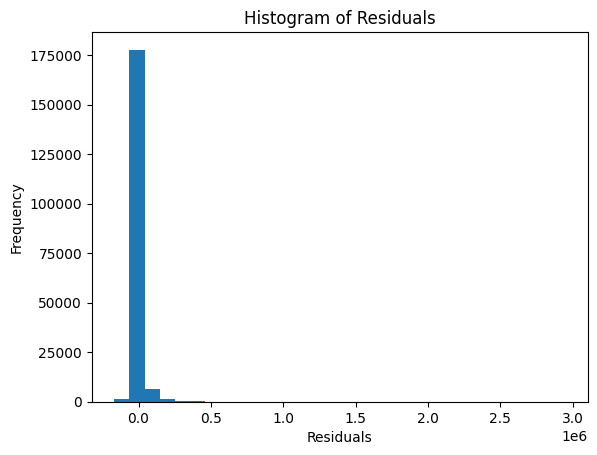

In [34]:
residuals = y_train - y_train_preds

# Plot the histogram of the residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

So it appears we have some very large residuals, which appears to be driven by a few cars that are huge. So, we delete all the prices beyond the 99.9th percentile from the training data

In [35]:
# Calculate the 99.9th percentile of the 'price' column in the training data
percentile_99_9 = train_data['price'].quantile(0.999)

# Filter the training data to remove rows where 'price' is greater than the 99.9th percentile
train_data_filtered = train_data[train_data['price'] <= percentile_99_9]

# Print the shape of the original and filtered training data to see how many rows were removed
print(f"Original train data shape: {train_data.shape}")
print(f"Filtered train data shape: {train_data_filtered.shape}")

# Now train_data_filtered contains the data with prices below the 99.9th percentile.
# You can use train_data_filtered for your further analysis and modeling.


Original train data shape: (188533, 99)
Filtered train data shape: (188385, 99)


We rerun the linear regression and plot the residuals:

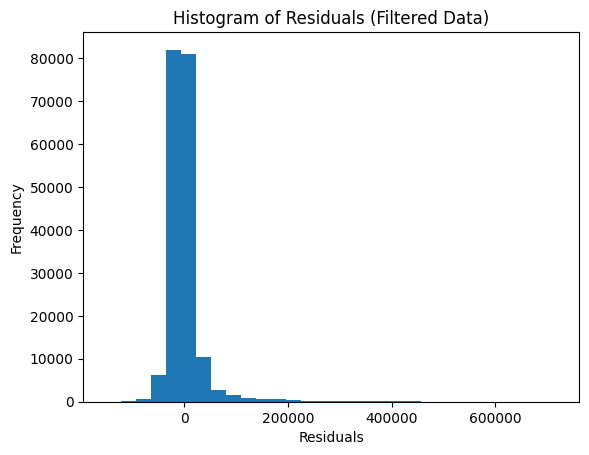

In [36]:
# Define features (X) and target (y) for training data
X_train_filtered = train_data_filtered.drop(['price', 'id', 'label'], axis=1)
y_train_filtered = train_data_filtered['price']

# Create and train the linear regression model
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

# Predict prices for the training data
y_train_preds_filtered = model_filtered.predict(X_train_filtered)

# Calculate the residuals
residuals_filtered = y_train_filtered - y_train_preds_filtered

# Plot the histogram of the residuals
plt.hist(residuals_filtered, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Filtered Data)")
plt.show()


The residuals look right skewed. So, instead, we may want to run a gamma regression and potentially also select some features out---or use a Lasso etc. But I will leave this up to you :-)